In [14]:
import subprocess
import sqlite3 as sql
import Bio
%load_ext sql
%sql sqlite://

'Connected: @None'

In [15]:
#run_RNAfold( "This arg is a fasta file", RNAfold.path = "C:/Python36/RNAfold.exe", parallel.cores = 2)


In [16]:
proc = subprocess.run(args, input, stdout=subprocess.PIPE, stderr=subprocess.PIPE, check=True)

NameError: name 'args' is not defined

In [3]:
%%sql
CREATE TABLE switches (name, OBS1_start, OBS1_end, OBS2_start, OBS2_end, red1_start, red1_end, red2_start, red2_end);
INSERT INTO switches VALUES ('YES-1',26, 47,       'na',       'na',     16,         21,       49,         54);
INSERT INTO switches VALUES ('NOT-1',44, 76,       'na',       'na',     40,         43,       74,         77);
INSERT INTO switches VALUES ('AND-1',30, 45,        49,         64,      70,         77,       16,         23);
INSERT INTO switches VALUES ('OR-1', 27, 46,        47,         66,      16,         26,       67,         77);

 * sqlite://
Done.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

YES-1 gate: 5' GGG CGA CC CUG AUG AGC UUG AGU UUA GCU CGU CAC UGU CCA GGU UCA AUC AGG CGA AAC GGU GAA AGC CGU AGG UUG CCC 

NOT-1 gate: 5' GGC AGG UAC AUA CAG CUG AUG AGU CCC AAA UAG GAC GAA ACG CGA CAC ACA CCA CUA AAC CGU GCA GUG UUU UGC GUC CUG UAU UCC ACU GC

AND-1 gate: 5' GGG CGA CCC UGA UGA GCU UGG UUU AGU AUU UAC AGC UCC AUA CAU GAG GUG UUA UCC CUA UGC AAG UUC GAU CAG GCG AAA CGG UGA AAG CCG UAG GUU GCC CAG AGA CAA U

OR-1 gate: GGG CGA CCC UGA UGA GCU UGG UUG AGU AUU UAC AGC UCC AUA CAU GAG GUG UUC UCC CUA CGC AAG UUC GAU CAG GCG AAA CGG UGA AAG CCG UAG GUU GCC C

In [4]:
%%bash
RNAfold -p -d2 --noPS --noLP -T 37 < YES_1gate.fasta

>seq1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) [-28.47]
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) {-28.10 d=1.23}
 frequency of mfe structure in ensemble 0.55091; ensemble diversity 2.32  


In [5]:
%%bash
RNAfold -p -d2 --noPS --noLP -T 37 < NOT_1gate.fasta

>seq1
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) [-28.47]
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) {-28.10 d=1.23}
 frequency of mfe structure in ensemble 0.55091; ensemble diversity 2.32  


In [6]:
%%bash
RNAfold -p -d2 --noPS --noLP -T 37 < AND_1gate.fasta

>seq1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... (-42.10)
((((((((((((((((((((.,.(((.....(((.(((.......))).))).....))).,))))))),})))).....(((((....))))).))))))))......... [-43.17]
((((((((((((((((((((...(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).))))))))......... {-42.10 d=2.75}
 frequency of mfe structure in ensemble 0.175296; ensemble diversity 4.21  


In [21]:
%%bash
RNAfold -p -d2 --noPS --noLP -T 37 < OR_1gate.fasta

>seq1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).)))))))) (-40.00)
(((((((((((((((((((({{.,((.....(((.(((.......))).))).,,,.,,}}.))))))),})))).....(((((....))))).)))))))) [-41.34]
((((((((((((((((((((((.........(((.(((.......))).))).......)).))))))).))))).....(((((....))))).)))))))) {-39.20 d=4.80}
 frequency of mfe structure in ensemble 0.114521; ensemble diversity 6.51  


In [26]:
%%bash
RNAplot -p -d2 --noPS --noLP

C:\Python36\RNAplot.exe: invalid option -- p


In [19]:
%%bash
sed -i 's/ \*\$//' OR_1gate.fasta
cat OR_1gate.fasta

>seq1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGU
GUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUG
CCC


In [20]:
%%bash
cat OR_1gate.fasta | RNAplot -o svg

ERROR: structure missing for record 0



In [4]:
from IPython.display import Image

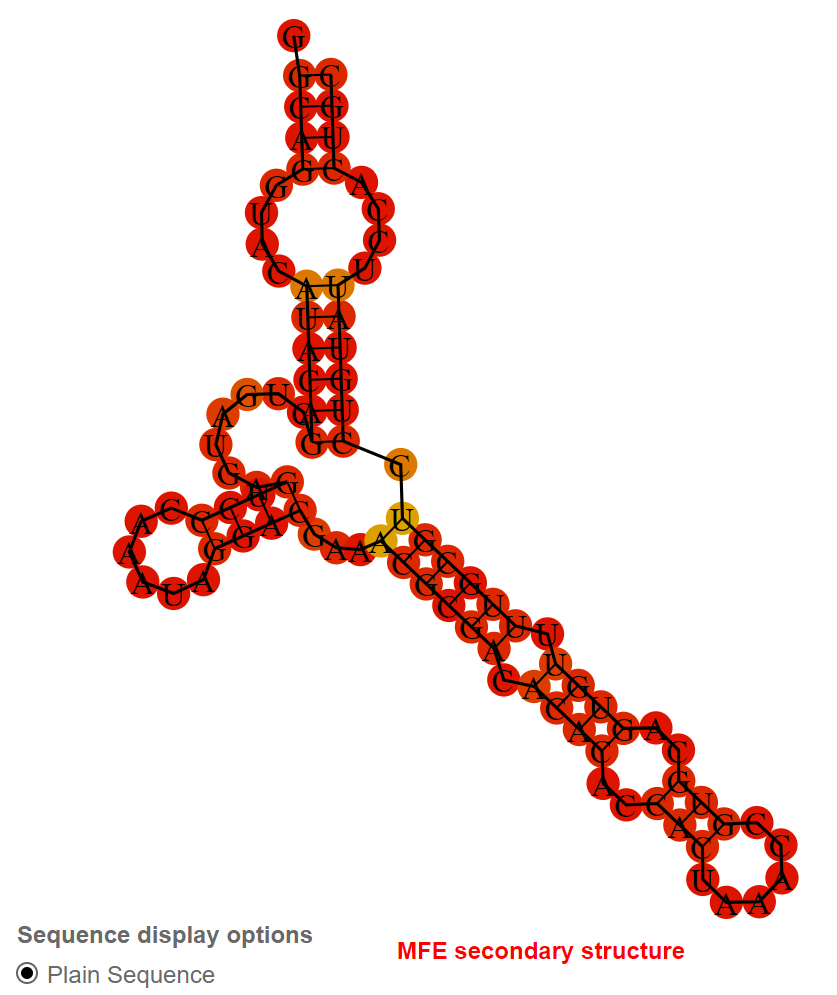

In [5]:
Image('YESgate.png')

The image above was generated by the RNAfold webserver. It's differences from the secondary structure in the paper seem to stem from the fact that the 5' end G is not paired, and hangs off, making subsequent pairing options different. There are some extra loops due to this difference, and also the fact that the paper's structure allows for unpaired A's at position 21 and 47, whereas the RNAfold structure does not show that.

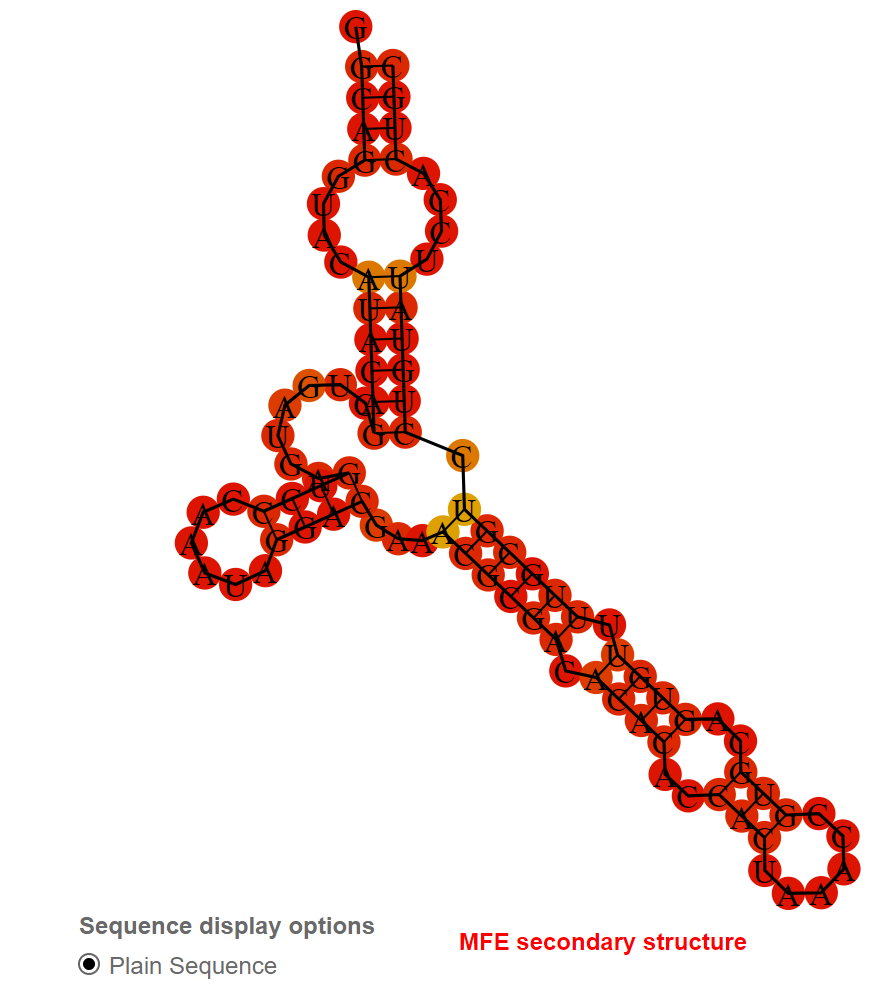

In [6]:
Image('NOTgate.png')

The 5' G is unpaired in both the paper's structure and ours. The first loop encountered (starting from the 5' end) is exactly the same, opening with a GC pair and closing with an AU pair. The next two loops are also the same in terms of opening and closing pairs, including the chain and then loop around position 30. The three loops on the 50-70-70 portion are also identical to that in the paper.

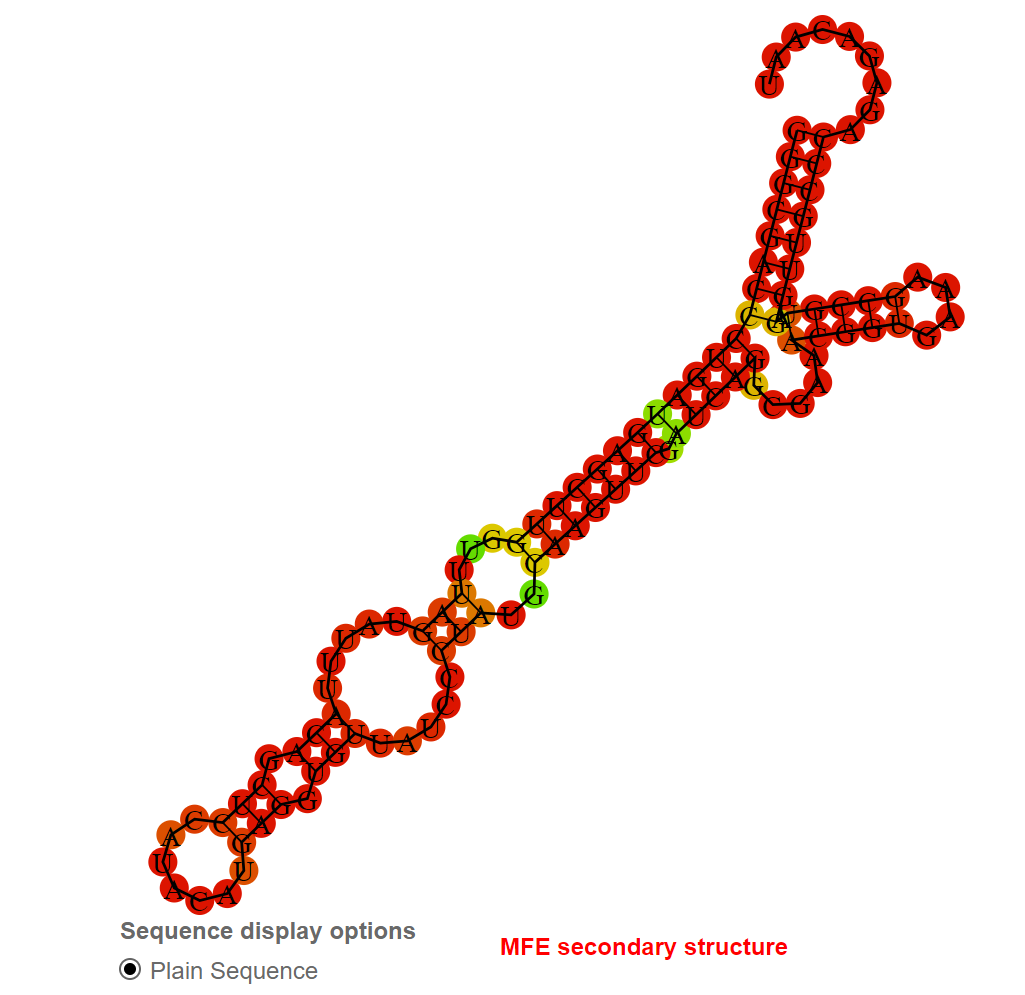

In [7]:
Image('ANDgate.png')

Starting from the 5' end, the first pair on our structure matches the first pair on the paper's structure for the AND-1 riboswitch. The 81-94 loop is identical. In fact, all the loops are identical. I have a more firm belief now that the structure in the paper is the real structure.

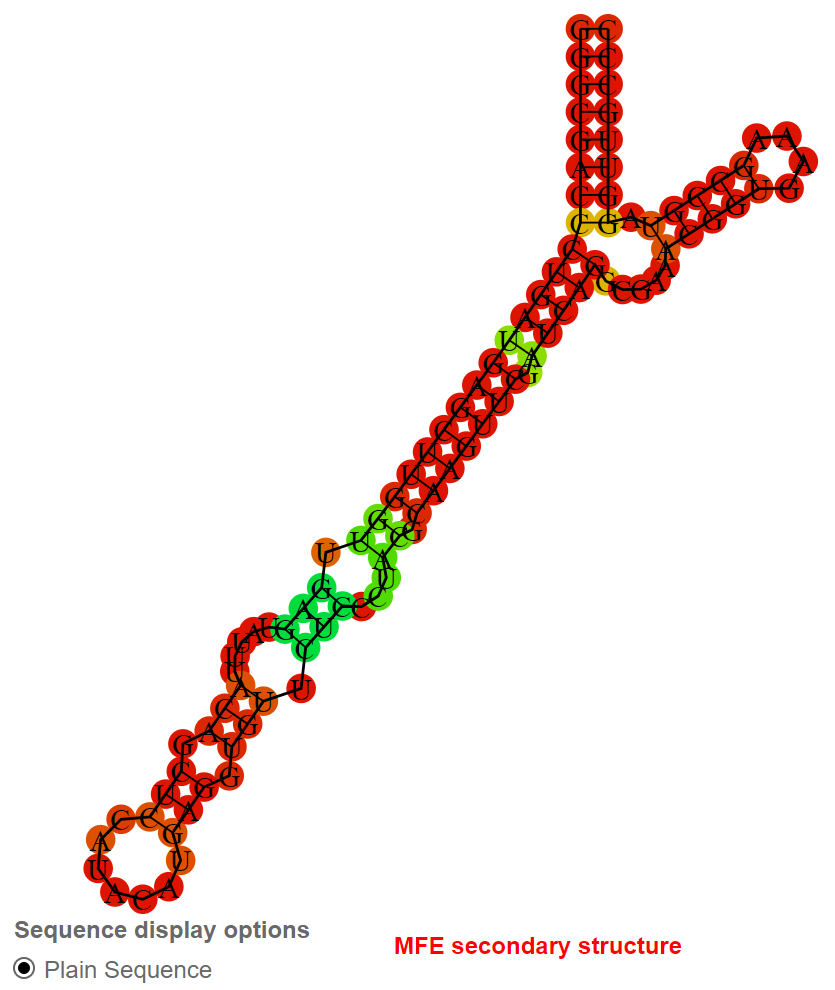

In [8]:
Image('ORgate.png')

This structure is also identical to the OR-1 structure in the paper, including the unpaired G's at positions 62 and 70. All the loop start and end pairs match as well.